In [1]:
# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
weather = pd.read_csv("../asset/weather.csv")
key = pd.read_csv("../asset/key.csv")
df_train_with_station_nbr = pd.read_csv("df_train_with_station_nbr_201806202007.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("weather  data : ", weather.shape)

import pickle
import awesome_functions as cf

slack_url = pickle.load(open("send_url.pickle", "rb"))
slack_url

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_weather = weather.copy()
df_key = key.copy()
df = df_train_with_station_nbr.copy()

Train data :  (4617600, 4)
Test  data :  (526917, 3)
weather  data :  (20517, 20)


In [27]:
def toNegative(data):
    tmp = str(data).strip()
    if tmp == "M":
        return -100
    return float(data)

In [16]:
df_weather["depart_m"].min()

-35.0

In [28]:
df_weather["depart_m"] = df_weather["depart"].apply(toNegative)

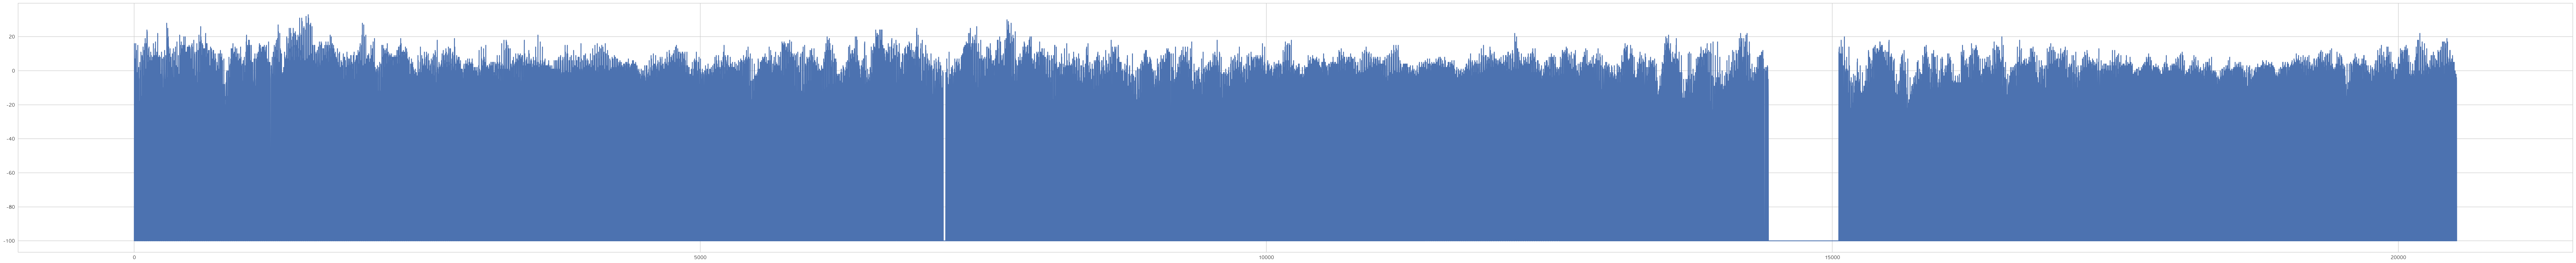

In [39]:
plt.figure(figsize=(100, 10))
plt.plot(df_weather["depart_m"])
plt.show()

In [ ]:
def fillMissingDepartData(df):
    df_depart = df[["date", "station_nbr", "tavg", "depart"]]
    stations = df["station_nbr"].unique()
    for station in stations:
        df_depart_station = df_depart[df_depart]

In [176]:
df_weather = weather.copy()

In [177]:
def getCodesumUniqueDataList(df):
    df_codesum = df["codesum"]
    codesum_data_list = []
    for i, codesum in enumerate(df_codesum):
        codesum = str(codesum).strip()
        cds = codesum.split(" ")
        isNeedToCheck = True
        if len(cds) != 0:
            for cd in cds:
                if cd != "":
                    if len(cd) > 3:
                        if cd[:2] not in codesum_data_list:
                            if codesum_num[cd[:2]] == 0:
                                print(cd[:2], i)
                            codesum_data_list.append(cd[:2])
                        if cd[2:] not in codesum_data_list:
                            if codesum_num[cd[2:]] == 0:
                                print(cd[2:], i)
                            codesum_num[cd[2:]]
                            codesum_data_list.append(cd[2:])
                    else:   
                        if codesum_num[cd] == 0:
                            print(cd, i)
                        if cd not in codesum_data_list:
                            codesum_data_list.append(cd)
    return codesum_data_list

In [178]:
li = getCodesumUniqueDataList(df_weather)

FZ 0
MI 14
VC 151
BL 321
BC 365
PR 14094


In [79]:
codesum_formats = [
 "Rain", "Freezing", "Fog", "Mist", "Unknown Precipitation",\
 "HeavyFog", "Shallow", "Snow", "Haze", "ThunderStorm", "Vicinity",\
 "Drizzle", "Blowing", "Patches", "Widespread Dust", "Squall", "Ice Pellets",\
 "Smoke", "Hail", "Small Hail or Snow Pellets", "Snow Grains", "Partial"
]

In [87]:
codesum_dict = dict(zip(li, codesum_formats))

In [90]:
codesum_dict["RA"]

'Rain'

In [170]:
def setCodesumUniqueDataList(codesum):
    codesums = str(codesum).strip().split(" ")
    for cd in codesums:
        if cd != "":
            if len(cd) > 3:
                if cd[:2] == format_d:
                    return 1
                if cd[2:] == format_d:
                    return 1
            else:   
                if cd == format_d:
                    return 1
        else: 
            return 0

In [158]:
codesum_num["FZ"] == 0

True

In [164]:
a = df_weather["codesum"].apply(setCodesumUniqueDataList)

# ADD RA Column

In [136]:
df_weather.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,BL,BC,DU,SQ,PL,FU,GR,GS,SG,PR
20512,16,2014-10-31,53,34,44,M,35,41,21,0,...,0,0,0,0,0,0,0,0,0,0
20513,17,2014-10-31,59,34,47,M,32,41,18,0,...,0,0,0,0,0,0,0,0,0,0
20514,18,2014-10-31,67,49,58,-4,40,50,7,0,...,0,0,0,0,0,0,0,0,0,0
20515,19,2014-10-31,45,33,39,-6,24,32,26,0,...,0,0,0,0,0,0,0,0,0,0
20516,20,2014-10-31,68,50,59,M,39,50,6,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
for fm in li:
    format_d = fm
    df_weather[fm] = df_weather["codesum"].apply(setCodesumUniqueDataList)

In [207]:
format_d = "RA"
df_weather[format_d] = df_weather["codesum"].apply(setCodesumUniqueDataList)

In [208]:
df_weather[format_d].sum()

5325.0

In [306]:
num = []
for cd in li:
    num.append(round(df_weather[cd].sum() / len(df_weather), 3))

In [307]:
codesum_num = dict(zip(li, num))

In [309]:
codesum_dict["BR"]

'Mist'

In [308]:
codesum_num

{'RA': 0.26,
 'FZ': 0.016,
 'FG': 0.045,
 'BR': 0.31,
 'UP': 0.011,
 'FG+': 0.041,
 'MI': 0.003,
 'SN': 0.049,
 'HZ': 0.072,
 'TS': 0.092,
 'VC': 0.028,
 'DZ': 0.024,
 'BL': 0.003,
 'BC': 0.005,
 'DU': 0.001,
 'SQ': 0.001,
 'PL': 0.001,
 'FU': 0.002,
 'GR': 0.0,
 'GS': 0.0,
 'SG': 0.0,
 'PR': 0.0}

In [273]:
df_weather_vif = cf.remove_m_row(df_weather, cols)

원본 데이터프레임 length : 20517
제거하고 싶은 컬럼 : ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']
제거한 int 컬럼 : ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool']
제거한 float 컬럼 : ['preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']
제거한 후 데이터프레임 length : 18124


In [267]:
df_weather_vif.drop("date", axis = 1, inplace=True)

In [241]:
cols = [
        "tmax", "tmin", "tavg", "dewpoint", "wetbulb", "heat", "cool", "preciptotal",\
        "stnpressure", "sealevel", "resultspeed", "resultdir", "avgspeed"
       ]

In [248]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def getVif(df):
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["features"] = df.columns
    vif = vif.sort_values("VIF Factor").reset_index(drop=True)
    return vif

In [259]:
df_weather = df_weather.fillna(0)

In [268]:
getVif(df_weather_vif)

,VIF Factor,features
0,1.000667,SG
1,1.006098,GS
2,1.006356,FU
3,1.010757,PR
4,1.014634,station_nbr
5,1.021021,PL
6,1.034458,GR
7,1.039331,SQ
8,1.069457,DZ
9,1.088582,HZ


In [238]:
cf.isThereNoneData(df_weather)

M Data over 60% : []
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,station_nbr,20517,0,0.00,0,0.00,0,0.0
1,date,20517,0,0.00,0,0.00,0,0.0
2,tmax,20517,906,4.42,0,0.00,0,0.0
3,tmin,20517,908,4.43,0,0.00,0,0.0
4,tavg,20517,1469,7.16,0,0.00,0,0.0
5,dewpoint,20517,666,3.25,0,0.00,0,0.0
6,wetbulb,20517,1252,6.10,0,0.00,0,0.0
7,heat,20517,1469,7.16,0,0.00,0,0.0
8,cool,20517,1469,7.16,0,0.00,0,0.0
9,preciptotal,20517,860,4.19,2410,11.75,0,0.0


In [270]:
df = pickle.load(open("preprocess_date.pkl", "rb"))

In [271]:
df.columns

Index(['date', 'store_nbr', 'item_nbr', 'units', 'log1p', 'date2',
       'station_nbr', 'preciptotal_flag', 'depart_flag', 'weekday',
       'is_weekend', 'is_holiday', 'is_holiday_weekday', 'is_holiday_weekend',
       'day', 'month', 'year', 'holiday_name', 'around_BlackFriday'],
      dtype='object')

In [186]:
df = df[["date", "station_nbr", "units", "weekday", "holiday_name", "month", "around_BlackFriday"]]

In [274]:
df = df.merge(df_weather_vif, on=["date", "station_nbr"], how="inner")

In [281]:
df.columns

Index(['date', 'store_nbr', 'item_nbr', 'units', 'log1p', 'date2',
       'station_nbr', 'preciptotal_flag', 'depart_flag', 'weekday',
       'is_weekend', 'is_holiday', 'is_holiday_weekday', 'is_holiday_weekend',
       'day', 'month', 'year', 'holiday_name', 'around_BlackFriday', 'tmax',
       'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed', 'RA',
       'FZ', 'FG', 'BR', 'UP', 'FG+', 'MI', 'SN', 'HZ', 'TS', 'VC', 'DZ', 'BL',
       'BC', 'DU', 'SQ', 'PL', 'FU', 'GR', 'GS', 'SG', 'PR'],
      dtype='object')

In [294]:
cols = []
not_in_cols = [
               "DU", "PR", "SG", "GS", "GR", "FU", "PL", "SQ", "BL", "MI",\
               "store_nbr", "item_nbr", "log1p", "date2", "preciptotal_flag", "depart_flag",\
               "is_holiday_weekend", "is_holiday_weekday", "day", "year",\
               "date", "tmax", "tmin", "tavg", "depart", "codesum", "preciptotal", "station_nbr",\
               "dewpoint", "wetbulb", "heat", "cool", "sunrise", "snowfall", "sunset",\
               "stnpressure", "sealevel", "resultspeed", "resultdir", "depart_m", "avgspeed"
              ]

for column in df.columns:
    if column not in not_in_cols:
        cols.append(column)

In [368]:
codesum_num

{'RA': 0.26,
 'FZ': 0.016,
 'FG': 0.045,
 'BR': 0.31,
 'UP': 0.011,
 'FG+': 0.041,
 'MI': 0.003,
 'SN': 0.049,
 'HZ': 0.072,
 'TS': 0.092,
 'VC': 0.028,
 'DZ': 0.024,
 'BL': 0.003,
 'BC': 0.005,
 'DU': 0.001,
 'SQ': 0.001,
 'PL': 0.001,
 'FU': 0.002,
 'GR': 0.0,
 'GS': 0.0,
 'SG': 0.0,
 'PR': 0.0}

In [365]:
def getUnitsByCodesum(df):
    result_li = []
    for codesum in li:
        df_ = df[df[codesum] != 0]
        day_length = len(df_)
        print(str(codesum) + "인 Row의 수 : " + str(day_length))
        df_units = df_[df_["units"] != 0]
        length = len(df_units)
        print(str(codesum) + "인 날에 팔린 아이템들의 총 량 : " + str(length))
        result_li.append(round(length/day_length, 2))
    return result_li

In [366]:
unitsByCodesum = getUnitsByCodesum(df)

RA인 Row의 수 : 55412
RA인 날에 팔린 아이템들의 총 량 : 28193
FZ인 Row의 수 : 4123
FZ인 날에 팔린 아이템들의 총 량 : 1930
FG인 Row의 수 : 10193
FG인 날에 팔린 아이템들의 총 량 : 4836
BR인 Row의 수 : 63701
BR인 날에 팔린 아이템들의 총 량 : 32358
UP인 Row의 수 : 1964
UP인 날에 팔린 아이템들의 총 량 : 960
FG+인 Row의 수 : 8284
FG+인 날에 팔린 아이템들의 총 량 : 3922
MI인 Row의 수 : 635
MI인 날에 팔린 아이템들의 총 량 : 303
SN인 Row의 수 : 11453
SN인 날에 팔린 아이템들의 총 량 : 5494
HZ인 Row의 수 : 13006
HZ인 날에 팔린 아이템들의 총 량 : 6897
TS인 Row의 수 : 21016
TS인 날에 팔린 아이템들의 총 량 : 11002
VC인 Row의 수 : 4972
VC인 날에 팔린 아이템들의 총 량 : 2679
DZ인 Row의 수 : 3032
DZ인 날에 팔린 아이템들의 총 량 : 1683
BL인 Row의 수 : 729
BL인 날에 팔린 아이템들의 총 량 : 341
BC인 Row의 수 : 1312
BC인 날에 팔린 아이템들의 총 량 : 719
DU인 Row의 수 : 286
DU인 날에 팔린 아이템들의 총 량 : 162
SQ인 Row의 수 : 109
SQ인 날에 팔린 아이템들의 총 량 : 72
PL인 Row의 수 : 155
PL인 날에 팔린 아이템들의 총 량 : 91
FU인 Row의 수 : 531
FU인 날에 팔린 아이템들의 총 량 : 273
GR인 Row의 수 : 16
GR인 날에 팔린 아이템들의 총 량 : 10
GS인 Row의 수 : 68
GS인 날에 팔린 아이템들의 총 량 : 31
SG인 Row의 수 : 4
SG인 날에 팔린 아이템들의 총 량 : 3
PR인 Row의 수 : 4
PR인 날에 팔린 아이템들의 총 량 : 2


## 그 해당 날들에 팔린 아이템 총 수량 / Weather Event가 발생한 Row의 숫자 

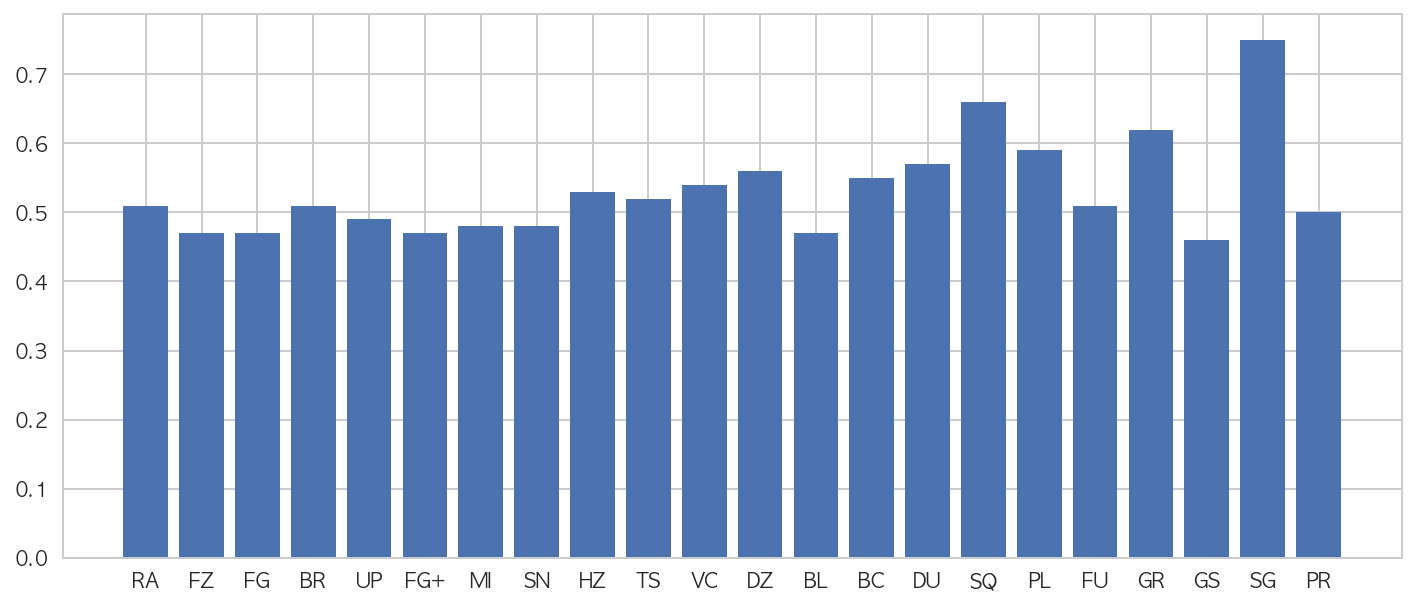

In [364]:
plt.figure(figsize=(12, 5))
plt.bar(li, unitsByCodesum)
plt.show()

In [362]:
sp.stats.chisquare(unitsByCodesum)

Power_divergenceResult(statistic=0.20287788215200683, pvalue=1.0)

In [327]:
sp.stats.chisquare(np.array(unitsByCodesum) * 100)

Power_divergenceResult(statistic=20.287788215200685, pvalue=0.503103622241716)

In [296]:
dfX.columns

Index(['units', 'weekday', 'is_weekend', 'is_holiday', 'month', 'holiday_name',
       'around_BlackFriday', 'RA', 'FZ', 'FG', 'BR', 'UP', 'FG+', 'SN', 'HZ',
       'TS', 'VC', 'DZ', 'BC'],
      dtype='object')

In [124]:
def getFormula(df, categorical_columns, target_column):
    """
        df : 회귀분석할 df
        categorical_columns : 카테고리 컬럼명 리스트
        target_column : target column명 문자열
    """
    columns = df.columns
    formula = target_column + " ~ "
    for i, column in enumerate(columns):
        if column != target_column:
            if i != 0:
                formula += " + "
            if column in categorical_columns:
                formula += "C(" + column + ")"
            else:
                formula += str(column)
    return formula

In [300]:
models = sm.OLS.from_formula(getFormula(dfX, ["around_BlackFriday", "weekday", "holiday_name"], "units"), data=dfX)

In [301]:
result = models.fit()

In [310]:
codesum_dict["TS"]

'ThunderStorm'

<module 'statsmodels.api' from '/usr/local/lib/python3.6/site-packages/statsmodels/api.py'>

In [378]:
import statsmodels.stats.api as sms

In [389]:
def model_check(result) : 
    # residual normality test 
    Chi_square , P_value = sms.omni_normtest(result.resid)
    normality = pd.DataFrame(columns = [["Residual Normality Test" , "Residual Normality Test"],["Chi Square" , "P-Value"]])
    normality.loc[len(normality)] = [round(Chi_square,2) , round(P_value,2) ]

    # heteroskedacity test : 종속 변수 값의 분산이 독립 변수의 값과 관계 없이 어느 정도 고정인가? 
    a, b, c, d = sms.het_white(result.resid, result.model.exog)
    heteroskedacity = pd.DataFrame(columns =[["Heteroskedacity Test","Heteroskedacity Test","Heteroskedacity Test","Heteroskedacity Test"],['Lagrange Statistic' ,'P-Value', 'F-Value', 'F P-Value' ]])
    heteroskedacity.loc[len(heteroskedacity)] = [round(a ,2 ), round(b, 2), round(c, 2), round(d ,2)]
  
    # multicollinearity test : condition number 구함 
    print("")
    multicollinearity = pd.DataFrame(columns = [["Multicollinearity" ],["condition number"]])
    multicollinearity.loc[len(multicollinearity)] = [round(np.linalg.cond(result.model.exog) ,2)]
    x = pd.concat([normality, heteroskedacity, multicollinearity], axis = 1)
    
    return x

In [390]:
model_check(result)

Residual Normality Test         Heteroskedacity Test                  \
               Chi Square P-Value   Lagrange Statistic P-Value F-Value   
0               463559.03     0.0                77.73     1.0    0.24   

            Multicollinearity  
  F P-Value  condition number  
0       1.0      6.125613e+15

In [388]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  units   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     44.18
Date:                Mon, 02 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:02:30   Log-Likelihood:            -1.1229e+06
No. Observations:              219767   AIC:                         2.246e+06
Df Residuals:                  219723   BIC:                         2.246e+06
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                -4.596e+10   1.24e+11     -0.371      0.710   -2.89e+11    1.97e+11
C(weekday)[T.1]                             -2.4289      0.376     -6.459      0.000      -3.166      -1.692
C(weekday)[T.2]                             -3.1290      0.350     -8.950      0.000      -3.814      -2.444
C(weekday)[T.3]                             -3.0764      0.356     -8.642      0.000      -3.774      -2.379
C(weekday)[T.4]                             -1.4668      0.388     -3.778      0.000      -2.228      -0.706
C(weekday)[T.5]                          -5.723e+11    4.7e+11     -1.218      0.223   -1.49e+12    3.49e+11
C(weekday)[T.6]                          -5.723e+11    4.7e+11     -1.218      0.223   -1.49e+12    3.49e+11
C(holiday_name)[T.BlackFriday]            4.596e+10   1.24e+11      0.371      0.710   -1.97e+11    2.89e+11
C(holiday_name)[T.BlackFriday1]           2.656e+10   6.22e+10      0.427      0.670   -9.54e+10    1.49e+11
C(holiday_name)[T.BlackFriday2]           2.248e+10   6.23e+10      0.361      0.718   -9.96e+10    1.45e+11
C(holiday_name)[T.BlackFriday3]          -3.757e+12   6.05e+12     -0.621      0.535   -1.56e+13     8.1e+12
C(holiday_name)[T.BlackFridayM2]           2.51e+10    6.2e+10      0.405      0.686   -9.65e+10    1.47e+11
C(holiday_name)[T.BlackFridayM3]          2.313e+10   6.19e+10      0.373      0.709   -9.83e+10    1.45e+11
C(holiday_name)[T.ChristmasDay]            -21.5393      2.939     -7.328      0.000     -27.300     -15.778
C(holiday_name)[T.ChristmasEve]             -3.4513      2.278     -1.515      0.130      -7.916       1.013
C(holiday_name)[T.ColumbusDay]              -4.1919      2.144     -1.955      0.051      -8.393       0.010
C(holiday_name)[T.EasterSunday]             -9.6029      2.010     -4.777      0.000     -13.543      -5.663
C(holiday_name)[T.FathersDay]               -8.9190      2.162     -4.126      0.000     -13.156      -4.682
C(holiday_name)[T.Halloween]                -9.1070      2.045     -4.452      0.000     -13.116      -5.098
C(holiday_name)[T.IndependenceDay]          -4.6395      2.050     -2.263      0.024      -8.657      -0.622
C(holiday_name)[T.LaborDay]                  0.2094      2.058      0.102      0.919      -3.824       4.243
C(holiday_name)[T.MartinLutherKingDay]      -3.0355      2.012     -1.509      0.131      -6.979       0.908
C(holiday_name)[T.MemorialDay]              -6.1657      2.163     -2.851      0.004     -10.404      -1.927
C(holiday_name)[T.MothersDay]               -9.7158      2.077     -4.679      0.000     -13.786      -5.646
C(holiday_name)[T.NewYearsDay]               2.6872      2.087      1.288      0.198      -1.403       6.778
C(holiday_name)[T.PresidentsDay